# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [47]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

from scipy import stats

In [48]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [49]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [50]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

### Plotting Race vs Call

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [52]:
df = data[['race','call']]

In [53]:
df.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


In [54]:
w = df[data.race=='w']
b = df[data.race=='b']

In [55]:
b_callbacks = b.call.sum()
b_len = len(b)
percent_b = (b_callbacks*100) / b_len
percent_b

6.447638603696099

In [56]:
w_callbacks = w.call.sum()
w_len = len(w)
percent_w = (w_callbacks * 100) / w_len
percent_w

9.650924024640657

C:\Users\doshpara\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


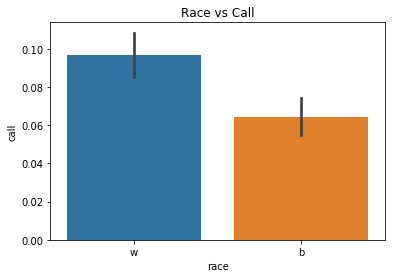

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='race',y='call',data=df)
plt.title('Race vs Call')
plt.show()

### Statistical test

First let's check the CLT conditions. In this case we have large enough sample and the samples are independent. So yes, it meets the CLT conditions.

Let's check if the distribution is normal or not before deciding the type of test to use here. 

(array([2200.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         235.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32), <a list of 10 Patch objects>)

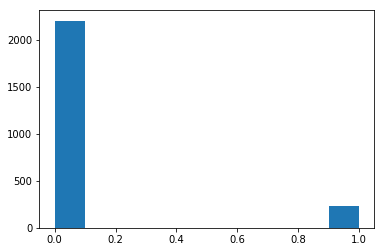

In [58]:
plt.hist(w.call)

(array([2278.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         157.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32), <a list of 10 Patch objects>)

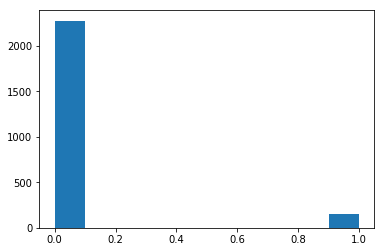

In [59]:
plt.hist(b.call)

This is a binomial distribution and not a normal distribution so we can't apply a parametric test. So let's use z-test

null hypothesis: w_rate - b_rate = 0 

alternative hpyothesis: w_rate - b_rate != 0 

significance level = 0.05 

In [60]:
w_rate = percent_w / 100
b_rate = percent_b / 100
print(w_rate)
print(b_rate)

0.09650924024640657
0.06447638603696099


In [61]:
import math

#(p1-p2)
difference = w_rate - b_rate

#calculate p-bar
p_bar = (w_callbacks + b_callbacks) / (len(w) + len(b))

#calculate q-bar
q_bar = 1 - p_bar

# n1 & n2
n1 = len(w)
n2 = len(b)

#calculate (1/n1) + (1/n2)
x = np.add(np.divide(1,n1),np.divide(1,n2))

std = math.sqrt( (2*p_bar*1-p_bar) / n1 )

z_score = (difference - 0) / std

z_score

5.571428571428572

In [62]:
p_value = 1 - stats.norm.cdf(z_score)
p_value

1.2632947576918241e-08

The probability of getting a z-score and the p_value is small (less than 0.05 threshold) so we can reject the null hyptohesis. This means that the callback rate of white and black race are different. 

In [63]:
# Your solution to Q3 here

In [64]:
#calculate the margin of error
moe = 1.96 * np.sqrt(p_bar * q_bar * x)
moe

0.015281912310894095

In [65]:
ci = [(difference-moe), (difference+moe)]
print('With 95% confidence, the mean difference in call back proportions between whites and black is in the range of:\n{}'.format(ci))

With 95% confidence, the mean difference in call back proportions between whites and black is in the range of:
[0.01675094189855149, 0.04731476652033968]


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

Based on statistical test, we found that there is likely a significant difference in callback rate between black and white race. 

However, this doesn't mean that the race is the most important factor. To determine this, we need to run a different analysis and examine other variables as well. 